In [14]:
import pytensor
pytensor.config.cxx = ""

In [15]:
from physiokinematic.simulate import simulate
# Generate synthetic dataset
data = simulate(1, seed=5391).iloc[0]

In [17]:
data

glong         333.569018
glat           -1.692317
vlsr         -100.766119
e_vlsr               1.0
radius        113.084863
true_te      5774.059964
te           5774.059964
e_te               100.0
line           45.792637
e_line               0.1
line_unit       mJy/beam
fwhm           22.119921
line_freq         8000.0
telescope      simulated
beam_area    9178.029287
Rgal            3.911119
distance        5.871112
log10_n         1.677143
log10_q        48.443383
log10_Rs        0.507699
log10_em        4.163015
kdar                    
Name: 0, dtype: object

In [18]:
from physiokinematic import model
import importlib
importlib.reload(model)
pkmodel = model.model

In [19]:
# setup model
my_model = pkmodel(data)

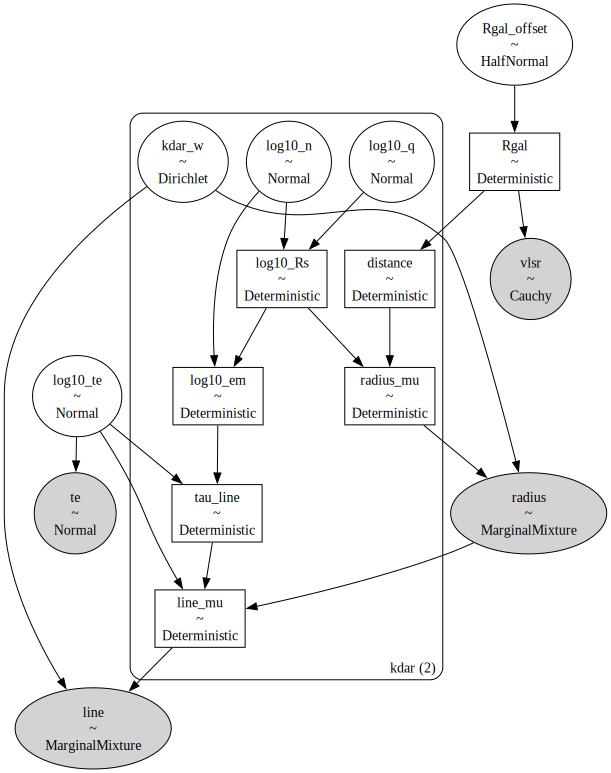

In [20]:
# visualize model
my_model.to_graphviz()

In [21]:
import pymc as pm

# sample prior predictive
with my_model:
    prior = pm.sample_prior_predictive(1000)

Sampling: [Rgal_offset, kdar_w, line, log10_n, log10_q, log10_te, radius, te, vlsr]


/var/folders/37/fz3nr39j6wz1yt2vpr9w4ctm0000gn/T/ipykernel_34475/1466864428.py:6: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(prior.prior_predictive["line"].data.flatten()), bins=20, color="gray", edgecolor="k", alpha=0.5)


Text(0.5, 0, 'log$_{10}$ Line (K)')

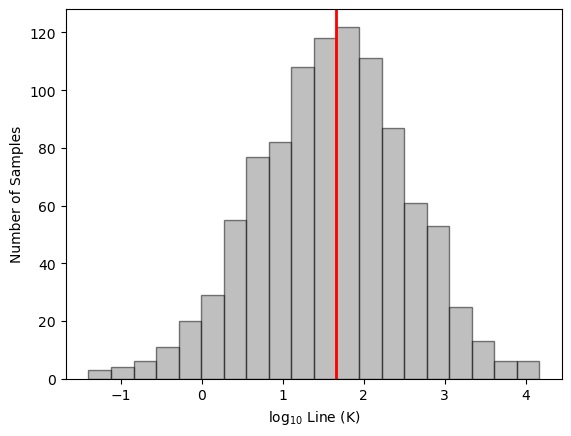

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(np.log10(prior.prior_predictive["line"].data.flatten()), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(np.log10(data["line"]), color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel("log$_{10}$ Line (K)")

Text(0.5, 0, '$V_{\\rm LSR}$ (km s$^{-1}$)')

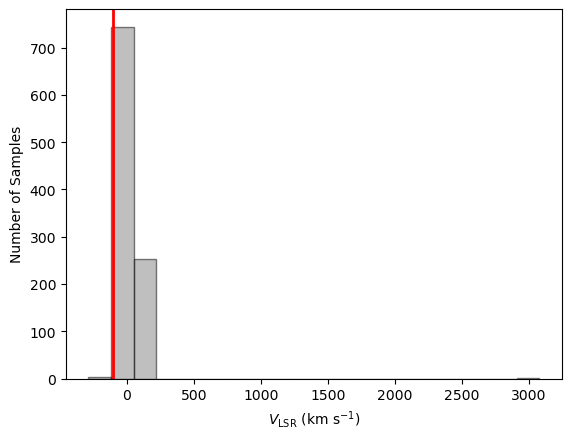

In [23]:
# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior_predictive["vlsr"].data.flatten(), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(data["vlsr"], color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel(r"$V_{\rm LSR}$ (km s$^{-1}$)")

/var/folders/37/fz3nr39j6wz1yt2vpr9w4ctm0000gn/T/ipykernel_34475/427146306.py:3: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(prior.prior_predictive["te"].data.flatten()), bins=20, color="gray", edgecolor="k", alpha=0.5)


Text(0.5, 0, 'log$_{10}$ $T_e$ (K)')

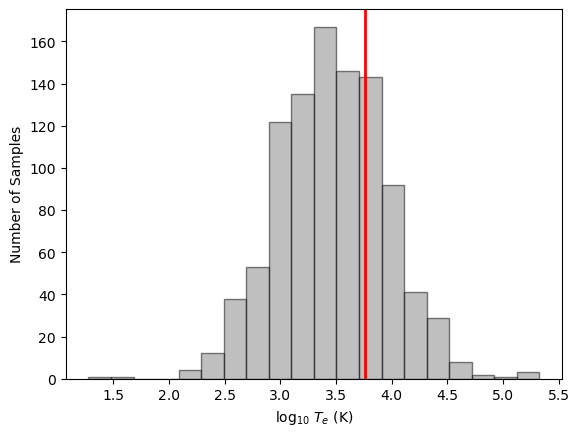

In [24]:
# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(np.log10(prior.prior_predictive["te"].data.flatten()), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(np.log10(data["te"]), color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel("log$_{10}$ $T_e$ (K)")

Text(0.5, 0, '$d$ (kpc)')

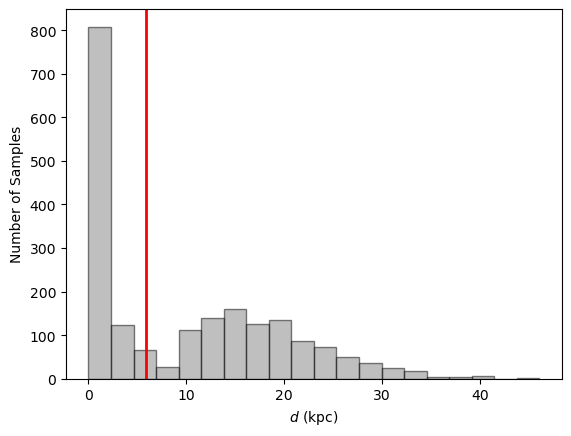

In [25]:
# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior["distance"].data.flatten(), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(data["distance"], color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel("$d$ (kpc)")

In [26]:
# sample posterior dont run on macbook. run on scylla 
with my_model:
    trace = pm.sample(chains=4, cores=4, tune=1000, draws=1000, target_accept=0.85)

/Users/ryanbakko/miniconda3/envs/physiokinematic/lib/python3.12/site-packages/pytensor/tensor/rewriting/elemwise.py:1027: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/ryanbakko/miniconda3/envs/physiokinematic/lib/python3.12/site-packages/pytensor/tensor/rewriting/elemwise.py:1027: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(


KeyboardInterrupt: 

In [27]:
 pm.summary(trace.sel(chain=[0, 1, 2]))

NameError: name 'trace' is not defined

In [ ]:
pm.plot_trace(trace.sel(chain=[0, 1, 2]))

In [ ]:
pm.plot_pair(trace, var_names=["log10_te", "Rgal", "distance"])

In [ ]:
# sample posterior predictive
with my_model:
    posterior = pm.sample_posterior_predictive(trace.sel(chain=[0, 1, 2], draw=slice(None, None, 10)))

In [ ]:
# plot posterior predictive samples
fig, ax = plt.subplots()
ax.hist(np.log10(posterior.posterior_predictive["line"].data.flatten()), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(np.log10(data["line"]), color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel("log$_{10}$ Line (K)")

In [ ]:
# plot posterior predictive samples
fig, ax = plt.subplots()
ax.hist(posterior.posterior_predictive["vlsr"].data.flatten(), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(data["vlsr"], color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel(r"$V_{\rm LSR}$ (km s$^{-1}$)")

In [ ]:
# plot posterior predictive samples
fig, ax = plt.subplots()
ax.hist(np.log10(posterior.posterior_predictive["te"].data.flatten()), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(np.log10(data["te"]), color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel("log$_{10}$ $T_e$ (K)")

In [ ]:
trace.posterior

In [ ]:
# plot posterior predictive samples
fig, ax = plt.subplots()
ax.hist(trace.posterior["kdar_w"].sel(chain=[0, 1, 2], kdar="F").data.flatten(), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.set_ylabel("Number of Samples")
ax.set_xlabel(r"$P_{\rm far}$")

In [ ]:
# plot posterior predictive samples
fig, ax = plt.subplots()
ax.hist(trace.posterior["distance"].sel(chain=[0, 1, 2], kdar="N").data.flatten(), bins=20, color="gray", edgecolor="k", alpha=0.5)
ax.axvline(data["distance"], color="r", lw=2)
ax.set_ylabel("Number of Samples")
ax.set_xlabel("$d$ (kpc)")